<a href="https://colab.research.google.com/github/harim061/data_science01/blob/main/Harim/dataS6_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 공공데이터 상권정보 분석해 보기
- 국가증정데이터인 상권정보를 살펴봅니다.

## 1.1 필요한 라이브러리 불러오기


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

## 1.2 시각화를 위한 폰트 설정

In [5]:
!pip install koreanize-matplotlib

import koreanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

%matplotlib inline

from IPython.display import set_matplotlib_formats

%config InlineBackend.figure_format = 'retina'

## 1.3 데이터 로드하기
- 판다스에서 데이터를 로드할 때는 read_csv를 사용
- 데이터를 로드해서 df라는 변수에 담기
- shpae를 통해 데이터의 갯수 찍기(행,열)

In [7]:
from google.colab import files
import warnings
warnings.filterwarnings("ignore")
data = files.upload()


Saving 소상공인시장진흥공단_상가업소정보_의료기관_201909.csv to 소상공인시장진흥공단_상가업소정보_의료기관_201909 (1).csv


In [8]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(data['소상공인시장진흥공단_상가업소정보_의료기관_201909.csv']))
df.shape

(91335, 39)

# 1.4 데이터 미리보기
- head, tail을 통해 미리 볼 수 있음

In [9]:
# head로 데이터를 미리보기
# shift + tab : docstring(공식문서) 볼 수 있
df.head(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4.0,NaN,127.053198,37.488742
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,...,4139013200117400001017064,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955


In [10]:
# tail로 마지막 데이터 불러오기
df.tail(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
91334,16109073,천안김안과천안역본점의원,NaN,S,의료,S01,병원,S01B13,안과의원,Q86201,...,4413110700102660017016314,김안과,충청남도 천안시 동남구 중앙로 92,330952.0,31127.0,NaN,NaN,NaN,127.152651,36.80664


## 1.5 데이터 요약하기
### 1.5.1 데이터 요약정보

In [11]:
# info로 데이터를 요약해서 봄
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

### 1.5.2 컬럼명 보기

In [12]:
# 컬럼명만 출력
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

### 1.5.3 데이터 타입

In [13]:
# 데이터 타입만 출력
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

## 1.6 결측치

In [14]:
df.isnull()
# data 값이 null 값이냐
# true면 null

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
3,False,False,True,False,False,False,False,False,False,True,...,False,True,False,False,False,True,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91330,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,True,True,False,False
91331,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
91332,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
91333,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,True,True,True,False,False


In [41]:
null_count = df.isnull().sum()
null_count

상가업소번호         0
상호명            0
상권업종대분류코드      0
상권업종대분류명       0
상권업종중분류코드      0
상권업종중분류명       0
상권업종소분류코드      0
상권업종소분류명       0
시도명          379
시군구코드        379
시군구명         379
행정동코드          0
행정동명         379
법정동코드         55
법정동명          55
지번코드           0
대지구분코드         0
대지구분명          0
지번본번지          0
지번주소           0
도로명코드          0
도로명            0
건물본번지          0
건물관리번호         0
도로명주소          0
구우편번호         12
신우편번호          2
경도             0
위도             0
dtype: int64

<Axes: >

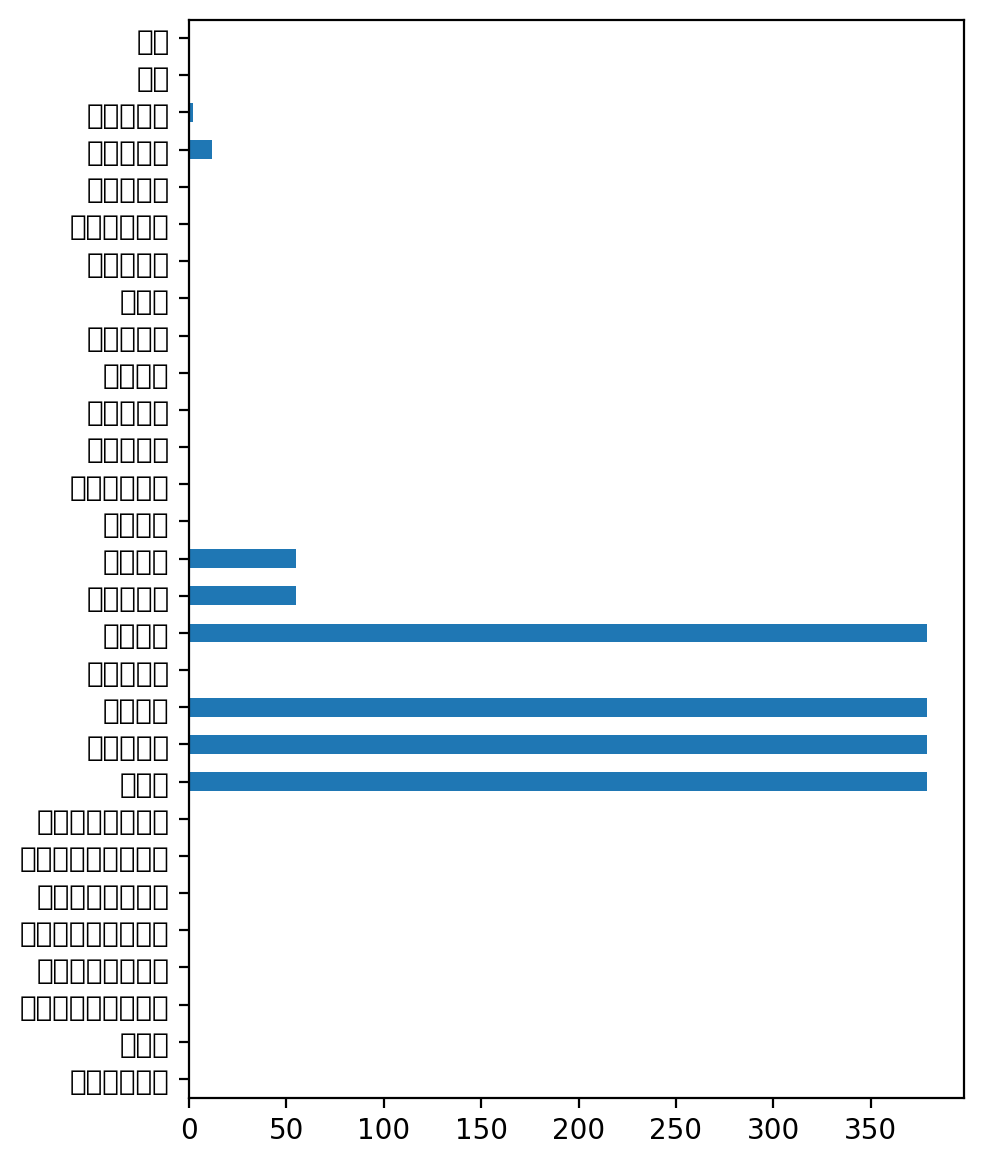

In [42]:
# plot.bar로 표현
null_count.plot.barh(figsize=(5,7))

In [17]:
# reset_index를 통해서 데이터프레임 만들어줌
df_null_count = null_count.reset_index()
df_null_count.head()

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


## 1.7 컬럼명 변경하기

In [18]:
df_null_count.columns = ["컬럼명","결축치수"]
df_null_count.head()

,컬럼명,결축치수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


## 1.8 정렬하기

In [19]:
# sort_values를 통해 정렬하기
df_null_count_top = df_null_count.sort_values(by="결축치수",ascending=False).head(10)
df_null_count_top

,컬럼명,결축치수
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75784
35,층정보,47291
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922
11,시도코드,379


# 1.9 특정 컬럼만 불러오기

In [20]:
# 지점명 컬럼을 불러온다
# NaN == Not a number 의 역자로 결축치를 의미

df["지점명"].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    수지점
Name: 지점명, dtype: object

In [21]:
# "컬럼명" 이라는 컬럼의 값만 가져와서 drop_columns 라는 변수에 담기
drop_columns = df_null_count_top["컬럼명"].tolist()
drop_columns

['지점명',
 '동정보',
 '건물부번지',
 '호정보',
 '층정보',
 '건물명',
 '지번부번지',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드']

In [22]:
# drop_columns 변수로 해당 컬럼 정보만 데이터프레임에서 가져옴
df[drop_columns].head()

,지점명,동정보,건물부번지,호정보,층정보,건물명,지번부번지,표준산업분류코드,표준산업분류명,시도코드
0,NaN,NaN,NaN,NaN,NaN,산호한양아파트,NaN,Q86201,일반 의원,41.0
1,NaN,NaN,NaN,NaN,4.0,NaN,14.0,Q86201,일반 의원,11.0
2,NaN,NaN,NaN,NaN,NaN,한라프라자,1.0,Q86201,일반 의원,41.0
3,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,NaN,26.0
4,수지점,NaN,NaN,NaN,1.0,NaN,2.0,G47811,의약품 및 의료용품 소매업,41.0


## 1.10 제거하기

In [23]:
# axis= 0 행 / axis=1 열
print(df.shape)
df =df.drop(drop_columns,axis=1)
print(df.shape)

(91335, 39)
(91335, 29)


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   시도명        90956 non-null  object 
 9   시군구코드      90956 non-null  float64
 10  시군구명       90956 non-null  object 
 11  행정동코드      91335 non-null  int64  
 12  행정동명       90956 non-null  object 
 13  법정동코드      91280 non-null  float64
 14  법정동명       91280 non-null  object 
 15  지번코드       91335 non-null  int64  
 16  대지구분코드     91335 non-null  int64  
 17  대지구분명      91335 non-null  object 
 18  지번본번지      91335 non-null  int64  
 19  지번주소       91335 non-null  object 
 20  도로명코드 

## 1.11 기초 통계값 보기
### 1.11.1 기초 통계 수치

In [25]:
# 평균값
df["위도"].mean()

36.62471119236685

In [26]:
# 중앙값
df["위도"].median()

37.2346523177033

In [27]:
# 최댓값
df["위도"].max()

38.4996585705598

In [28]:
# 최솟값
df["위도"].min()

33.2192896688307

In [29]:
# 갯수
df["위도"].count()

91335

### 1.11.2 기초통계값 요약하기 - describe

In [30]:
df["위도"].describe()

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [31]:
# 데이터프레임 형태도 생성
# 리스트형태로 ㄱ ㄱ

df[["위도","경도"]].describe()

,위도,경도
count,91335.000000,91335.000000
mean,36.624711,127.487524
std,1.041361,0.842877
min,33.219290,124.717632
25%,35.811830,126.914297
50%,37.234652,127.084550
75%,37.507463,128.108919
max,38.499659,130.909912


In [32]:
# 숫자형 데이터타입 요약
df.describe(include="number")


,상가업소번호,시군구코드,행정동코드,법정동코드,지번코드,대지구분코드,지번본번지,도로명코드,건물본번지,구우편번호,신우편번호,경도,위도
count,9.133500e+04,90956.000000,9.133500e+04,9.128000e+04,9.133500e+04,91335.000000,91335.000000,9.133500e+04,91335.000000,91323.000000,91333.00000,91335.000000,91335.000000
mean,2.121818e+07,32898.381877,3.293232e+09,3.293385e+09,3.293191e+18,1.001336,587.534549,3.293207e+11,251.200482,428432.911085,28085.47698,127.487524,36.624711
std,5.042828e+06,12985.393171,1.297387e+09,1.297706e+09,1.297393e+18,0.036524,582.519364,1.297391e+11,477.456487,193292.339066,18909.01455,0.842877,1.041361
min,2.901108e+06,11110.000000,1.111052e+09,1.111010e+09,1.111010e+18,1.000000,1.000000,1.111020e+11,0.000000,100011.000000,1000.00000,124.717632,33.219290
25%,2.001931e+07,26350.000000,2.635065e+09,2.635011e+09,2.635011e+18,1.000000,162.000000,2.635042e+11,29.000000,302120.000000,11681.00000,126.914297,35.811830
50%,2.211900e+07,41117.000000,4.111758e+09,4.111710e+09,4.111711e+18,1.000000,462.000000,4.111743e+11,92.000000,440300.000000,24353.00000,127.084550,37.234652
75%,2.480984e+07,43113.000000,4.311370e+09,4.311311e+09,4.311311e+18,1.000000,858.000000,4.311332e+11,257.000000,602811.000000,46044.00000,128.108919,37.507463
max,2.852470e+07,50130.000000,5.013061e+09,5.013032e+09,5.013061e+18,2.000000,7338.000000,5.013049e+11,8795.000000,799801.000000,63643.00000,130.909912,38.499659


In [33]:
# 문자열 데이터타입만 요약
df.describe(include="object")

# top 가장많이 등장한~..
# frep 빈도수

,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,건물관리번호,도로명주소
count,91335,91335,91335,91335,91335,91335,91335,90956,90956,90956,91280,91335,91335,91335,91335,91335
unique,56910,1,1,5,5,34,34,17,228,2791,2822,2,53118,16610,54142,54031
top,리원,S,의료,S01,병원,S02A01,약국,경기도,서구,중앙동,중동,대지,서울특별시 동대문구 제기동 965-1,서울특별시 강남구 강남대로,1123010300109650001031604,서울특별시 동대문구 약령중앙로8길 10
freq,152,91335,91335,60774,60774,18964,18964,21374,3165,1856,874,91213,198,326,198,198


### 1.11.3 중복제거한 값 보기
- unique로 중복을 제거한 값을 확인

In [34]:
# "상권업종대분류명"

df["상권업종대분류명"].unique()

array(['의료'], dtype=object)

In [35]:
df["상권업종대분류명"].nunique()

1